# Twitter users gender classification

Schloesing Benjamin, Yao Yuan, Ramet Gaétan

## Introduction

The objective of this project is to find features which can help to determine a Twitter user's gender using machine learning.

## Step 1 : Import data

The dataset we will use is the [Twitter User Gender Classification](https://www.kaggle.com/crowdflower/twitter-user-gender-classification) dataset made available by [Crowdflower](https://www.crowdflower.com/). This datasets contains 20000 entries, each of them being a tweet from different users, with many other associated features which are listed here:

* **_unit_id** : a unique id for each user
* **_golden** : a boolean which states whether the user is included in the golden standard for the model
* **_unit_state** : the state of the obervation, eiter *golden* for gold standards or *finalized* for contributor-judged
* **_trusted_judgments** : the number of judgment on a user's gender. 3 for non-golden, or a unique id for golden
* **_last_judgment_at** : date and time of the last judgment, blank for golden observations
* **gender** : either *male*, *female* or *brand* for non-human profiles
* **gender:confidence** : a float representing the confidence of the gender judgment
* **profile_yn** : either *yes* or *no*, *no* meaning that the user's profile was not available when contributors went to judge it
* **created** : date and time of when the profile was created
* **description** : the user's Tweeter profile description
* **fav_number** : the amount of favorited tweets by the user
* **gender_gold** : the gender if the profile is golden
* **link_color** : the link color of the profile as a hex value
* **name** : the Tweeter user's name
* **profile_yn_gold** : *yes* or *no* whether the profile y/n value is golden
* **profileimage** : a link to the profile image
* **retweet_count** : the number of times the user has retweeted something
* **sidebar_color** : color of the profile sidebar as a hex value
* **text** : text of a random tweet from the user
* **tweet_coord** : if the location was available at the time of the tweet, the coordinates as a string ith the format[latitude, longitude]
* **tweet_count** : number of tweet of the users
* **tweet_created** : the time of the random tweet in **text**
* **tweet_id** : the tweet id of the random tweet
* **tweet_location** : the location of the tweet, based on the coordinates
* **user_timezone** : the timezone of the user

Most of these features are not relevant for our analysis, we will only focus on a few of them

In [94]:
import pandas as pd
import numpy as np
from IPython.display import display

#graph
from bokeh.plotting import output_notebook, figure, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource

%matplotlib notebook 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage

from matplotlib import pyplot as plt
# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot





# we need latin-1 encoding because there are some special characters (é,...) that do not fit in default UTF-8
dataFrame = pd.read_csv('gender-classifier-DFE-791531.csv', encoding='latin-1')

#Show a sample of the dataset
dataFrame.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


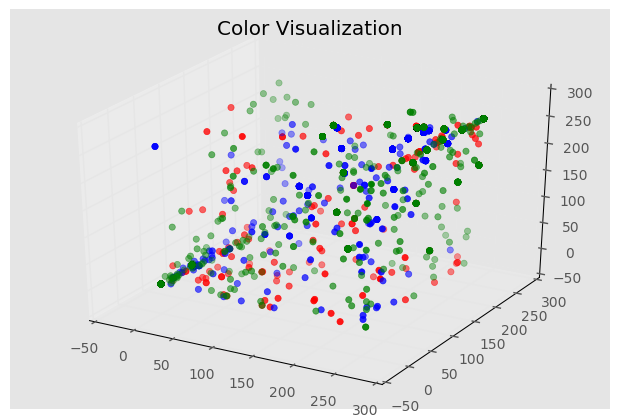

In [97]:
#dataFrame = dataFrame.sort_values(by = '_golden', ascending = False)
#dataFrame = dataFrame.sort_values(by = 'gender:confidence', ascending = False)
#display(dataFrame['profileimage'][1:10])

#Get profile pictures, to have it big just remove '_normal'
#pd.options.display.max_colwidth = 100
#print(dataFrame.loc[:10, 'profileimage'])

dataFrameCol = dataFrame.loc[:,['gender:confidence', 'gender', 'sidebar_color']]
dataFrameColSorted = dataFrameCol.sort_values(by = 'gender:confidence', ascending = False)
#print(dataFrameColSorted.query('1 in @gender:confidence))
dataFrameColFiltered = dataFrameCol[dataFrameCol['gender:confidence'] == 1]
#print(dataFrameColFiltered)

dataFrameColFilteredMale = dataFrameColFiltered[dataFrameColFiltered['gender'] == 'male']
dataFrameColFilteredFemale = dataFrameColFiltered[dataFrameColFiltered['gender'] == 'female']
dataFrameColFilteredBrand = dataFrameColFiltered[dataFrameColFiltered['gender'] == 'brand']

colorMale = dataFrameColFilteredMale['sidebar_color']
colorFemale = dataFrameColFilteredFemale['sidebar_color']
colorBrand = dataFrameColFilteredBrand['sidebar_color']


#print((colorMale.iloc[3]))
#var1 = colorMale.iloc[3]
#xvar1 = int(var1[0:3], 16)
#yvar1 = int(var1[3:6], 16)
#print(xvar1, yvar1)

#Remove 1.1E17 value ?? 
varMale = list(colorMale.values.flatten())
varMale.remove('1.10E+17')
varMale.remove('6.90E+29')
#print(varMale)
rVarMale = [int(x[0:2], 16) for x in varMale]
#print(xVarMale)
#intXVarMale = [int(x, 16) for x in xVarMale]
#xvarMale = int(varMale[:][0:3], 16)
#print(intXVarMale)
gVarMale = [int('0' + x[4:6], 16) for x in varMale]
bVarMale = [int('0' + x[2:4], 16) for x in varMale]

varFemale = list(colorFemale.values.flatten())
varFemale.remove('4.43E+03')
varFemale.remove('2.62E+55')
varFemale.remove('5.94E+61')
varFemale.remove('5.22E+22')
#print(varFemale)

rVarFemale = [int(x[0:2], 16) for x in varFemale]
gVarFemale = [int('0' + x[2:4], 16) for x in varFemale]
bVarFemale = [int('0' + x[4:6], 16) for x in varFemale]
#print(yVarFemale)

varBrand = list(colorBrand.values.flatten())
#print(varBrand)
rVarBrand = [int(x[0:2], 16) for x in varBrand]
gVarBrand = [int('0' + x[2:4], 16) for x in varBrand]
bVarBrand = [int('0' + x[4:6], 16) for x in varBrand]
#print(xVarBrand)




n = 100
#plt.figure(figsize=(15, 5))
#plt.plot(xVarBrand, yVarBrand, '.', alpha=.7, markersize=10, label='Brand')
#plt.plot(xVarMale, yVarMale, '.',alpha=.7, markersize=10, label='Male')
#plt.plot(xVarFemale, yVarFemale, '.',alpha=.7, markersize=10, label='Female')
#plt.legend()
#plt.show()

#Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)
# 3D Visualization
fig = pylab.figure(15)
ax = Axes3D(fig)
ax.scatter(rVarBrand, gVarBrand, bVarBrand, color = 'red')
ax.scatter(rVarMale, gVarMale, bVarMale, color = 'blue')
ax.scatter(rVarFemale, gVarFemale, bVarFemale, color = 'green')
pylab.title('Color Visualization')
pyplot.show()

#Trier couleurs selon : 3 premiers chiffres, 3 derniers (FFF, FFF) -> x,y graphs 

#print(dataFrame['profileimage'][1:10])
#print(pd.Series.value_counts(dataFrame['_golden']))
#print('coucou')
#print(pd.Series.value_counts(dataFrame['gender:confidence']))


